In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")


In [82]:
df=pd.read_csv("Mall_Customers.csv")
print(f"shape={df.shape}\nSize={df.size}")

shape=(200, 5)
Size=1000


**We have 200 rows and 5 columns in our Datset.**

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**We have 4 integer data type column and 1 Object data dtype column**

In [84]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


**There is no missing values in our dataset**

In [85]:
df.duplicated().sum()

0

**There is no duplicate values in our dataset**

In [86]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [87]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [88]:
skewness={}
for i in df.drop(["Gender"],axis=1).columns:
  s=df[i].skew()
  skewness[i]=s

feature=[]
Val=[]
Skew_type=[]
for key, value in skewness.items():
  feature.append(key)
  Val.append(value)
  t=1
  if value>0.5:
    t=2
  if value<-0.5:
    t=3
  if t==1:
    ty="Normal"
  if t==2:
    ty="Positively skewed"
  if t==3:
    ty="Negatively Skewed"
  Skew_type.append(ty)
Skew_df=pd.DataFrame({"Feature":feature,"Skewness":Val,"Nature":Skew_type})
Skew_df

,Feature,Skewness,Nature
0,CustomerID,0.000000,Normal
1,Age,0.485569,Normal
2,Annual Income (k$),0.321843,Normal
3,Spending Score (1-100),-0.047220,Normal


**All the features are Normally distributed**

<Axes: >

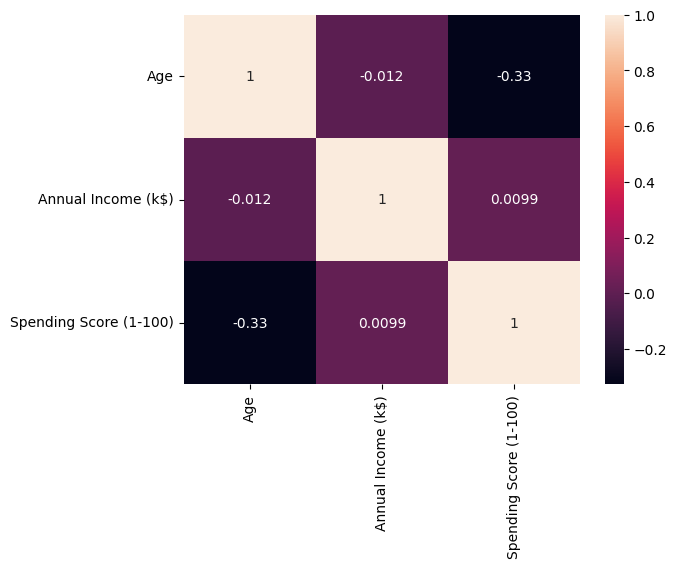

In [89]:
df_num=df.select_dtypes(include="number").drop(["CustomerID"],axis=1)
cor=df_num.corr()
sns.heatmap(cor,annot=True)

**There is no high multicolinearity exists in dataset.**

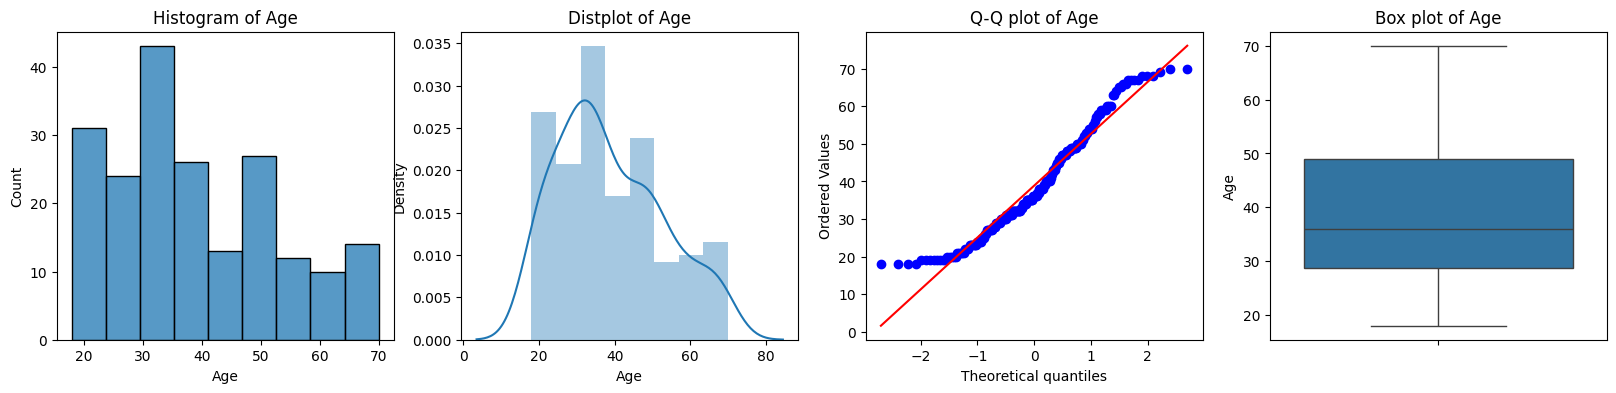

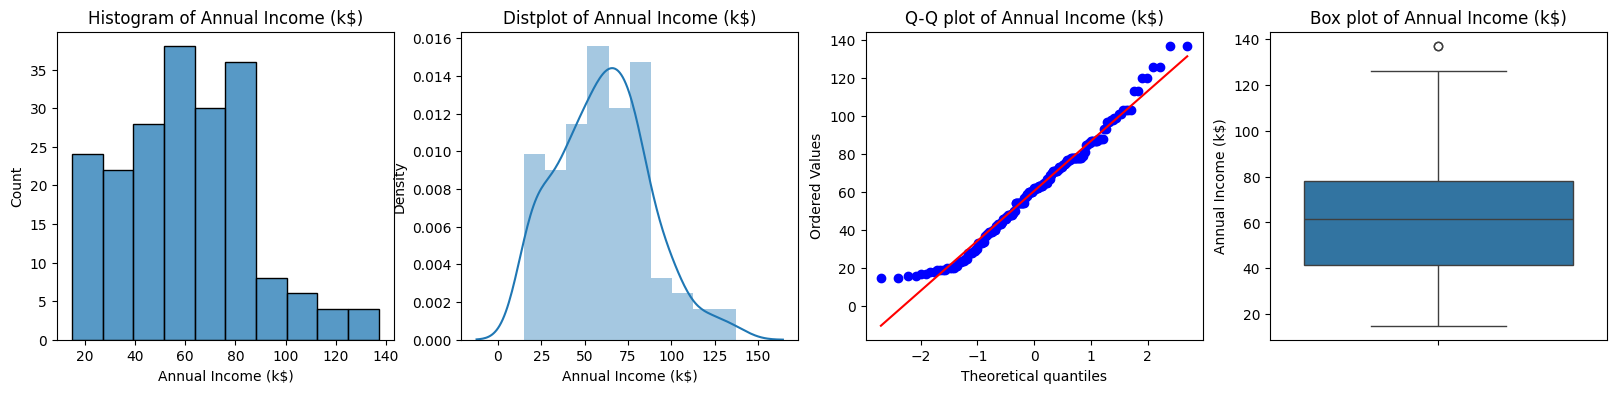

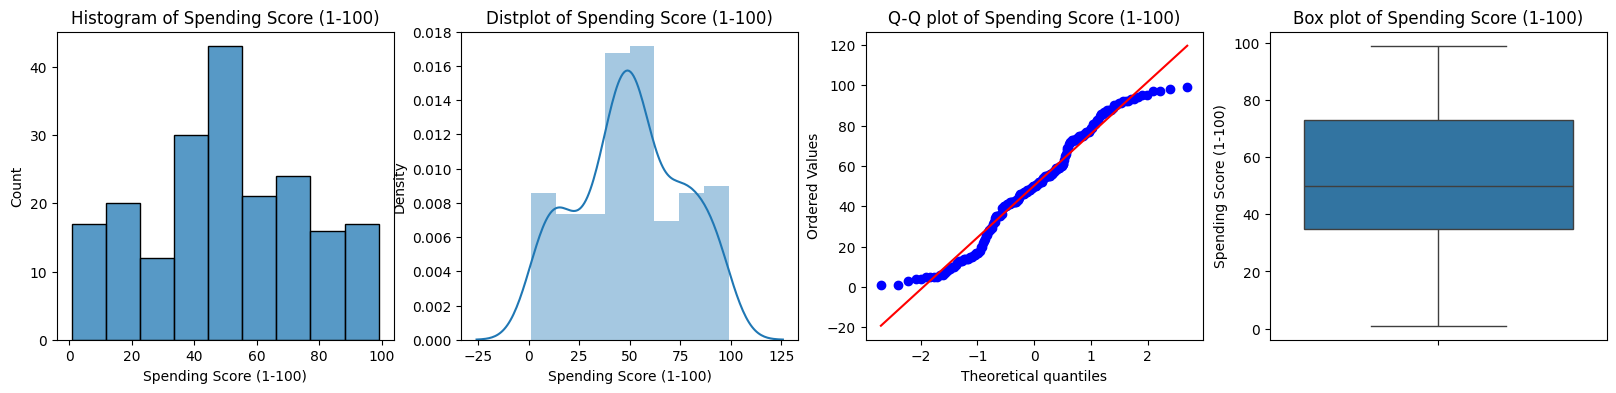

In [90]:
for i in df_num:
  plt.figure(figsize=(20,4))
  plt.subplot(141)
  sns.histplot(df[i])
  plt.title(f"Histogram of {i}")

  plt.subplot(142)
  sns.distplot(df[i])
  plt.title(f"Distplot of {i}")

  plt.subplot(143)
  sts.probplot(df[i],plot=plt)
  plt.title(f"Q-Q plot of {i}")

  plt.subplot(144)
  sns.boxplot(df[i])
  plt.title(f"Box plot of {i}")

**There is some outliers in Feature name "Annual Income"**

<Axes: ylabel='count'>

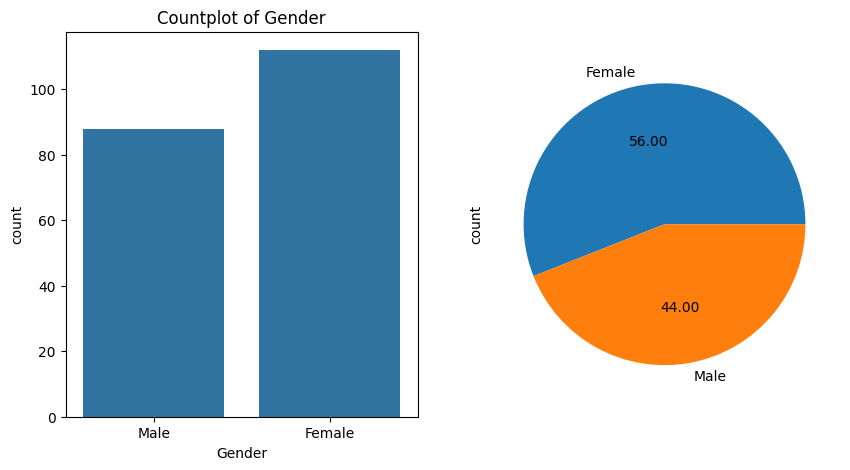

In [91]:
plt.figure(figsize=(10,5))
plt.subplot(121)
_=sns.countplot(df,x="Gender")
plt.title("Countplot of Gender")

plt.subplot(122)
df["Gender"].value_counts().plot(kind="pie",autopct="%.2f")

**We have slightly more no. of females as compare to male in our dataset**

In [92]:
from re import I
def remove_outlier(df,i):
  Q1=df[i].quantile(0.25)
  Q3=df[i].quantile(0.75)
  IQR=Q3-Q1
  lower_lim=Q1-1.5*IQR
  upper_lim=Q3+1.5*IQR
  df=df[(df[i]>=lower_lim) & (df[i]<=upper_lim)]
  df.reset_index(drop=True,inplace=True)
  return df

df_filt=remove_outlier(df,"Annual Income (k$)")

<Axes: >

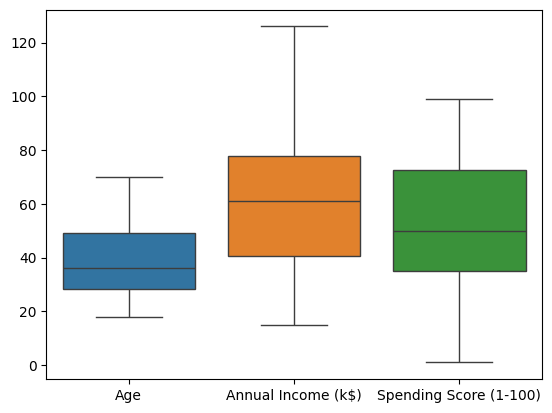

In [93]:
sns.boxplot(df_filt.drop([df.columns[0]],axis=1))

**Outliers are removed from Fetature.**

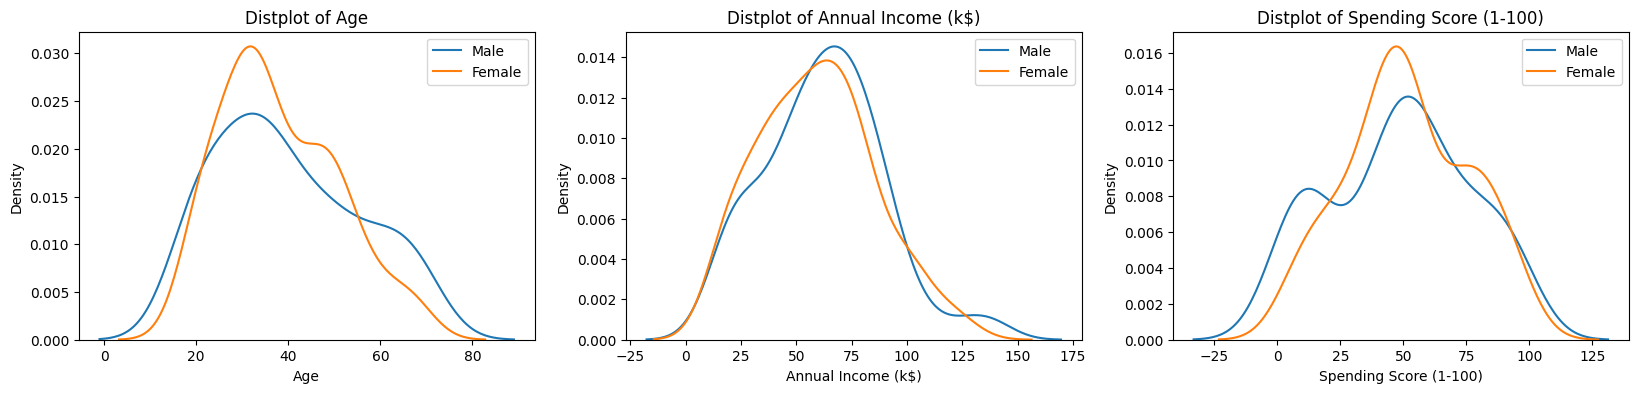

In [94]:
plt.figure(figsize=(20,4))
plt.subplot(131)
sns.distplot(df[df["Gender"]=="Male"]["Age"],hist=False,label="Male")
sns.distplot(df[df["Gender"]=="Female"]["Age"],hist=False,label="Female")
plt.title("Distplot of Age")
plt.legend()

plt.subplot(132)
sns.distplot(df[df["Gender"]=="Male"]["Annual Income (k$)"],hist=False,label="Male")
sns.distplot(df[df["Gender"]=="Female"]["Annual Income (k$)"],hist=False,label="Female")
plt.title("Distplot of Annual Income (k$)")
plt.legend()

plt.subplot(133)
sns.distplot(df[df["Gender"]=="Male"]["Spending Score (1-100)"],hist=False,label="Male")
sns.distplot(df[df["Gender"]=="Female"]["Spending Score (1-100)"],hist=False,label="Female")
plt.title("Distplot of Spending Score (1-100)")
plt.legend()

1. **Older individuals are more likely to be male.**
2. **Individuals with Annual income greater then 125 are likely to be male.**
3. **Individuals with spending score in between 25 to 50 are more likely to be females, and if we move to higher values there is almost equal chances of individual to be male or female.**

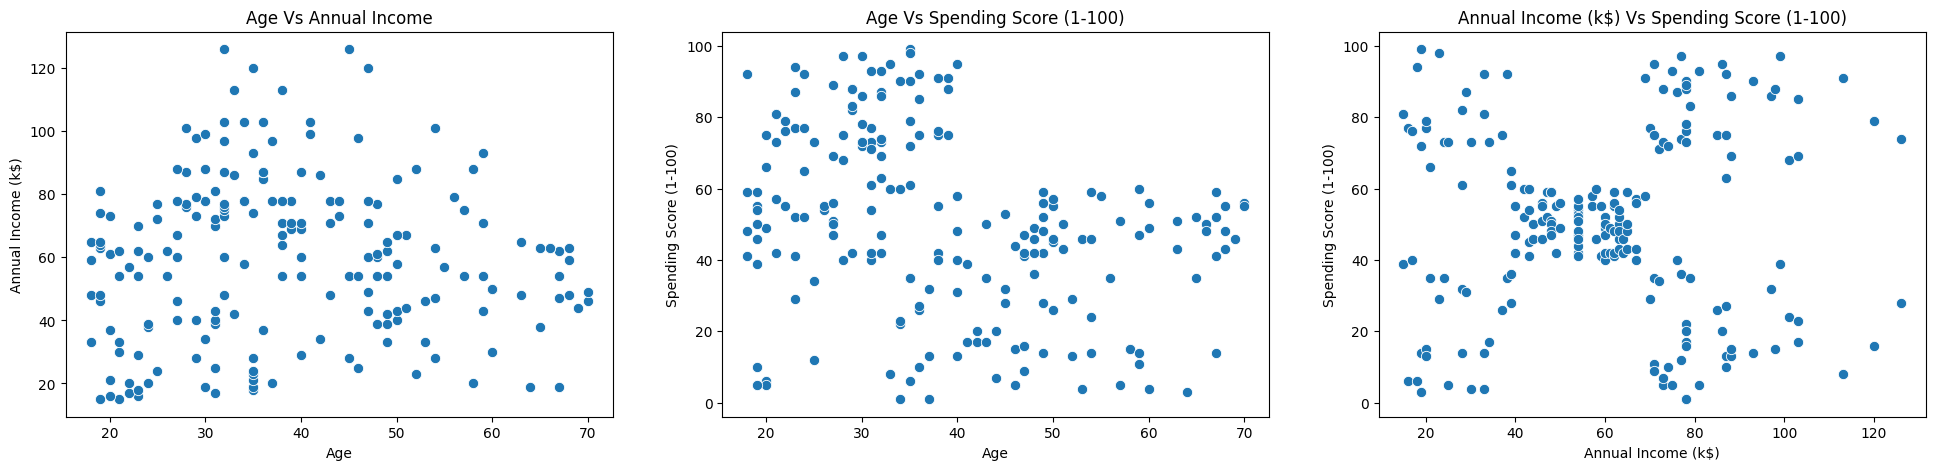

In [95]:
plt.figure(figsize=(24,5))
plt.subplot(131)
_=sns.scatterplot(x="Age",y="Annual Income (k$)",data=df_filt,s=55)
_=plt.title("Age Vs Annual Income")

plt.subplot(132)
_=sns.scatterplot(x="Age",y="Spending Score (1-100)",data=df_filt,s=55)
_=plt.title("Age Vs Spending Score (1-100)")

plt.subplot(133)
_=sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=df_filt,s=55)
_=plt.title("Annual Income (k$) Vs Spending Score (1-100)")

**From the above scatter plot we can see the most appropriate features for clustering is Annual income and Spending Score.**

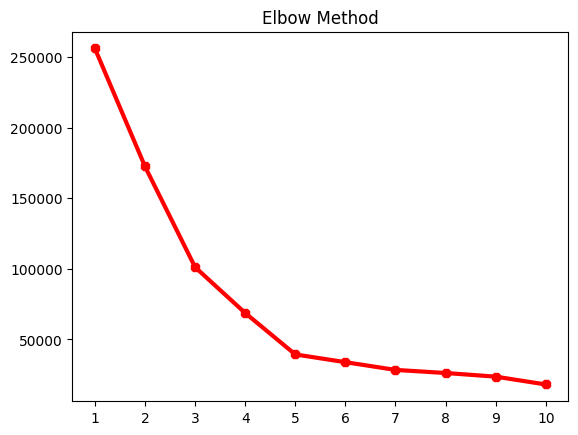

In [96]:
X1=df_filt[["Annual Income (k$)","Spending Score (1-100)"]]
from sklearn.cluster import KMeans
sse=[]
k_range=range(1,11)
for i in k_range:
  km=KMeans(n_clusters=i)
  km.fit_predict(X1)
  sse.append(km.inertia_)

plt.plot(k_range,sse,linewidth=3,color="red",marker="8")
_=plt.xticks(np.arange(1,11))
_=plt.title("Elbow Method")

**By Using elbow method, We have choosen the value of K to be 5**

In [97]:
km1=KMeans(n_clusters=5,random_state=20)
Label_1=pd.DataFrame(km1.fit_predict(X1),columns=["Labels"])
df_labled_1=pd.concat([df_filt,Label_1],axis=1)
df_labled_1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Labels
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


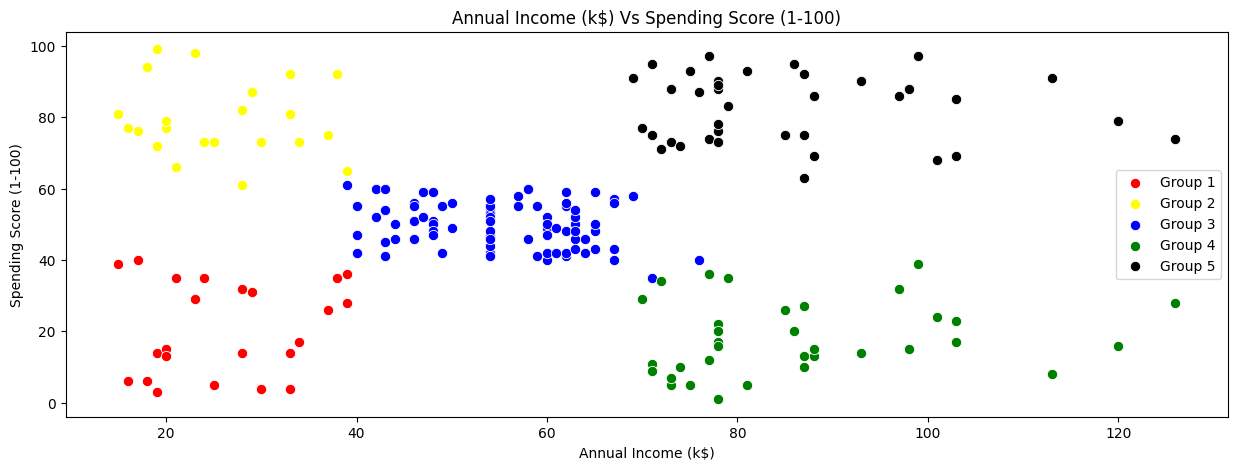

In [98]:
df_0=df_labled_1[df_labled_1["Labels"]==0]
df_1=df_labled_1[df_labled_1["Labels"]==1]
df_2=df_labled_1[df_labled_1["Labels"]==2]
df_3=df_labled_1[df_labled_1["Labels"]==3]
df_4=df_labled_1[df_labled_1["Labels"]==4]


plt.figure(figsize=(15,5))
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=df_2,s=55,label="Group 1",color="red")
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=df_3,s=55,label="Group 2",color="yellow")
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=df_0,s=55,label="Group 3",color="blue")
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=df_4,s=55,label="Group 4",color="green")
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=df_1,s=55,label="Group 5",color="black")
plt.legend()
_=plt.title("Annual Income (k$) Vs Spending Score (1-100)")

In [99]:
from sklearn.metrics import silhouette_score
print(f'The Silhoutte Score is {round(silhouette_score(X1,Label_1, metric="euclidean"),3)}')

The Silhoutte Score is 0.561


**We have classify the customers into 5 groups on the basis of anuual income and spending score.**

1. **Group-1:** Income range from (0-40) and Spending score from (0-40). **Low income and Low spending group.**
2. **Group-2:**Income range from (0-40) and Spending score from (60-100). **Low income and High spending group.**
3. **Group-3:**Income range from (40-60) and Spending score from (40-60). **Moderate income and Moderate spending group.**
4. **Group-4:**Income range from (60-120) and Spending score from (0-40). **High income and Low spending group.**
5. **Group-5:**Income range from (60-120) and Spending score from (60-100). **High income and High spending group.**

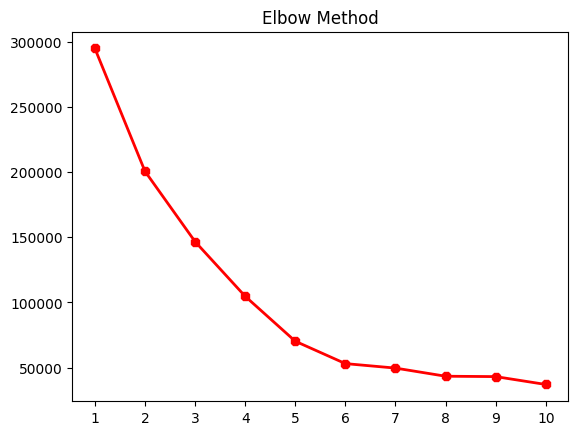

In [100]:
X2=df_filt[["Age","Annual Income (k$)","Spending Score (1-100)"]]
k_range1=range(1,11)
sse1=[]
for i in k_range1:
  km1=KMeans(n_clusters=i)
  km1.fit_predict(X2)
  sse1.append(km1.inertia_)

plt.plot(k_range,sse1,marker="8",linewidth=2,color="red")
_=plt.xticks(np.arange(1,11))
_=plt.title("Elbow Method")

**Taking Age, Annual income and spending scorewe have calculated the value of K which seems to be 6**

In [101]:
km2=KMeans(n_clusters=6)
labled_2=pd.DataFrame(km2.fit_predict(X2),columns=["Lables"])
df_labled_2=pd.concat([df_filt,labled_2],axis=1)
df_labled_2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Lables
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0


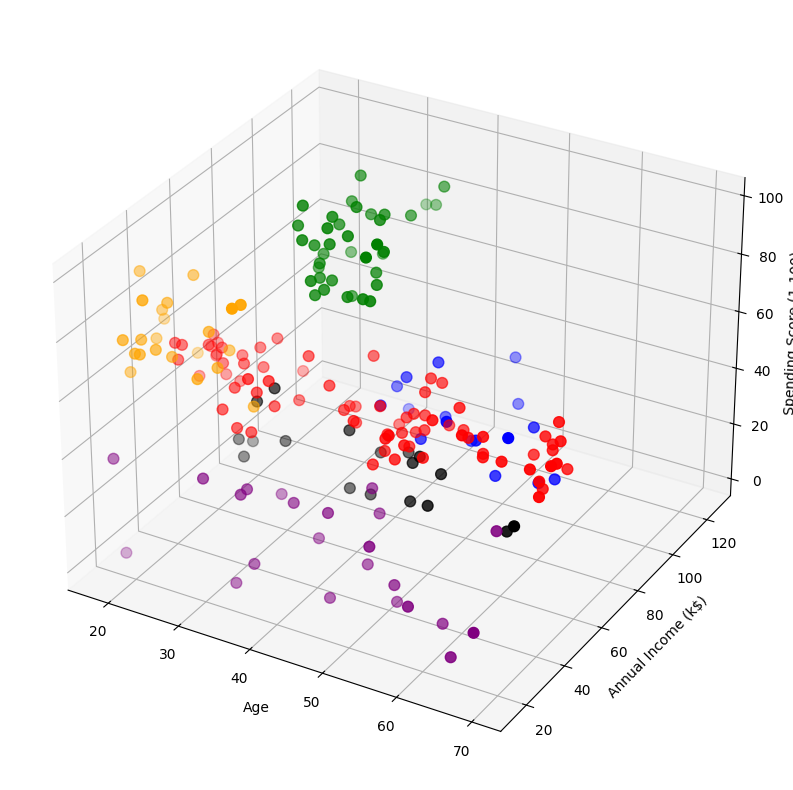

In [102]:
df_6=df_labled_2[(df_labled_2["Lables"]==0)]
df_7=df_labled_2[(df_labled_2["Lables"]==1)]
df_8=df_labled_2[(df_labled_2["Lables"]==2)]
df_9=df_labled_2[(df_labled_2["Lables"]==3)]
df_10=df_labled_2[(df_labled_2["Lables"]==4)]
df_11=df_labled_2[(df_labled_2["Lables"]==5)]

fig = plt.figure(figsize=(40,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_6["Age"],df_6["Annual Income (k$)"],df_6["Spending Score (1-100)"],c='purple', s=60)
ax.scatter(df_7["Age"],df_7["Annual Income (k$)"],df_7["Spending Score (1-100)"],c='red', s=60)
ax.scatter(df_8["Age"],df_8["Annual Income (k$)"],df_8["Spending Score (1-100)"],c='black', s=60)
ax.scatter(df_9["Age"],df_9["Annual Income (k$)"],df_9["Spending Score (1-100)"],c='green', s=60)
ax.scatter(df_10["Age"],df_10["Annual Income (k$)"],df_10["Spending Score (1-100)"],c='orange', s=60)
ax.scatter(df_11["Age"],df_11["Annual Income (k$)"],df_11["Spending Score (1-100)"],c='blue', s=60)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [103]:
print(f'The Silhoutte Score for feature Set-1 is {round(silhouette_score(X1,Label_1, metric="euclidean"),3)}')
print(f'The Silhoutte Score for feature Set-2 is {round(silhouette_score(X2,labled_2, metric="euclidean"),3)}')

The Silhoutte Score for feature Set-1 is 0.561
The Silhoutte Score for feature Set-2 is 0.413


**By seeing the Silhoutte score we conclude that the Clustering using features-"Annual Income" and "Spendind Score" perform better.**

In [104]:
df_segmented={}
customer_dfs = [df_0, df_1, df_2, df_3, df_4]
group=["1st","2nd","3rd","4th","5th"]
for j,i in enumerate(customer_dfs):
  val=i["CustomerID"].values
  df_segmented["Group"+"_"+str(j+1)]=val


df_segment=pd.DataFrame(dict([(k, pd.Series(v)) for k, v in df_segmented.items()]))
df_segment.head(10)

,Group_1,Group_2,Group_3,Group_4,Group_5
0,44,124.0,1.0,2.0,125.0
1,47,126.0,3.0,4.0,129.0
2,48,128.0,5.0,6.0,131.0
3,49,130.0,7.0,8.0,133.0
4,50,132.0,9.0,10.0,135.0
5,51,134.0,11.0,12.0,137.0
6,52,136.0,13.0,14.0,139.0
7,53,138.0,15.0,16.0,141.0
8,54,140.0,17.0,18.0,145.0
9,55,142.0,19.0,20.0,147.0
